In [19]:
# Cell 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)

In [20]:
# Cell 2: Load the dataset
logging.info("Loading dataset...")
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")
logging.info(f"Train data shape: {train_data.shape}")
logging.info(f"Test data shape: {test_data.shape}")

# Display the first few rows of the train dataset
train_data.head()

INFO:root:Loading dataset...
INFO:root:Train data shape: (891, 12)
INFO:root:Test data shape: (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
# Cell 3: Data Exploration
logging.info("Exploring data...")
logging.info(train_data.describe())

# Display summary statistics
train_data.describe()

INFO:root:Exploring data...
INFO:root:       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
# Cell 4: Data Preparation - Handle missing values in training data
logging.info("Handling missing values in training data...")
train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
train_data["Embarked"].fillna(train_data["Embarked"].mode()[0], inplace=True)
train_data.drop(columns=["Cabin"], inplace=True)
logging.info(train_data.isnull().sum())

# Display missing values count
train_data.isnull().sum()

INFO:root:Handling missing values in training data...
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/2327287052.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data["Age"].fillna(train_data["Age"].median(), inplace=True)
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/2327287052.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [23]:
# Cell 5: Data Preparation - Handle missing values in test data
logging.info("Handling missing values in test data...")
test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
test_data["Fare"].fillna(test_data["Fare"].median(), inplace=True)
test_data.drop(columns=["Cabin"], inplace=True)
logging.info(test_data.isnull().sum())

# Display missing values count
test_data.isnull().sum()

INFO:root:Handling missing values in test data...
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/2566697283.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data["Age"].fillna(test_data["Age"].median(), inplace=True)
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/2566697283.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work b

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [24]:
# Cell 6: Feature Engineering - Create new features
logging.info("Creating new features...")
train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1
logging.info(train_data[["SibSp", "Parch", "FamilySize"]].head())

# Display new features
train_data[["SibSp", "Parch", "FamilySize"]].head()

INFO:root:Creating new features...
INFO:root:   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1


,SibSp,Parch,FamilySize
0,1,0,2
1,1,0,2
2,0,0,1
3,1,0,2
4,0,0,1


In [25]:
# Cell 7: Feature Engineering - Extract titles from names
train_data["Title"] = train_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
test_data["Title"] = test_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)

# Simplify titles
title_mapping = {
    "Mr": 1,
    "Miss": 2,
    "Mrs": 3,
    "Master": 4,
    "Dr": 5,
    "Rev": 6,
    "Col": 7,
    "Major": 7,
    "Mlle": 8,
    "Countess": 9,
    "Ms": 2,
    "Lady": 9,
    "Jonkheer": 10,
    "Don": 11,
    "Dona": 11,
    "Mme": 3,
    "Capt": 7,
    "Sir": 11,
}
train_data["Title"] = train_data["Title"].map(title_mapping)
test_data["Title"] = test_data["Title"].map(title_mapping)

# Fill missing titles with the most common one
train_data["Title"].fillna(1, inplace=True)
test_data["Title"].fillna(1, inplace=True)
logging.info(train_data[["Name", "Title"]].head())

# Display titles
train_data[["Name", "Title"]].head()

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/62781023.py:2: SyntaxWarning: invalid escape sequence '\.'
  train_data["Title"] = train_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/62781023.py:3: SyntaxWarning: invalid escape sequence '\.'
  test_data["Title"] = test_data["Name"].str.extract(" ([A-Za-z]+)\.", expand=False)
/var/folders/yy/vfgg5nz953n71kdc7l33grdr0000gn/T/ipykernel_51313/62781023.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For

,Name,Title
0,"Braund, Mr. Owen Harris",1
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",3
2,"Heikkinen, Miss. Laina",2
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",3
4,"Allen, Mr. William Henry",1


In [26]:
# Cell 8: Encode categorical variables
logging.info("Encoding categorical variables...")
train_data = pd.get_dummies(train_data, columns=["Sex", "Embarked"], drop_first=True)
test_data = pd.get_dummies(test_data, columns=["Sex", "Embarked"], drop_first=True)
logging.info(train_data.head())

# Display encoded variables
train_data.head()

INFO:root:Encoding categorical variables...
INFO:root:   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  FamilySize  Title  Sex_male  Embarked_Q  \
0         A/5 21171   7.2500           2      1      True       False   
1          PC 17599  71.2833           2      3     False       False   
2  STON/O2. 3101282   7.9250           1      2     F

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,FamilySize,Title,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,2,1,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,2,3,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,1,2,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,2,3,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,1,1,True,False,True


In [27]:
# Cell 9: Align test data with training data
logging.info("Aligning test data with training data...")
X = train_data.drop(columns=["Survived", "Name", "Ticket", "PassengerId"])
y = train_data["Survived"]
test_data = test_data[X.columns]
logging.info(f"Features: {X.columns}")

# Display feature columns
X.columns

INFO:root:Aligning test data with training data...
INFO:root:Features: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Title',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'FamilySize', 'Title',
       'Sex_male', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [28]:
# Cell 10: Feature Scaling
logging.info("Scaling features...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
test_data_scaled = scaler.transform(test_data)
logging.info(f"Scaled features sample: {X_scaled[:5]}")

# Display scaled features sample
X_scaled[:5]

INFO:root:Scaling features...
INFO:root:Scaled features sample: [[ 0.82737724 -0.56573646  0.43279337 -0.47367361 -0.50244517  0.05915988
  -0.61912562  0.73769513 -0.30756234  0.61583843]
 [-1.56610693  0.66386103  0.43279337 -0.47367361  0.78684529  0.05915988
   0.95250095 -1.35557354 -0.30756234 -1.62380254]
 [ 0.82737724 -0.25833709 -0.4745452  -0.47367361 -0.48885426 -0.56097483
   0.16668767 -1.35557354 -0.30756234  0.61583843]
 [-1.56610693  0.4333115   0.43279337 -0.47367361  0.42073024  0.05915988
   0.95250095 -1.35557354 -0.30756234  0.61583843]
 [ 0.82737724  0.4333115  -0.4745452  -0.47367361 -0.48633742 -0.56097483
  -0.61912562  0.73769513 -0.30756234  0.61583843]]


array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517,
         0.05915988, -0.61912562,  0.73769513, -0.30756234,  0.61583843],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529,
         0.05915988,  0.95250095, -1.35557354, -0.30756234, -1.62380254],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426,
        -0.56097483,  0.16668767, -1.35557354, -0.30756234,  0.61583843],
       [-1.56610693,  0.4333115 ,  0.43279337, -0.47367361,  0.42073024,
         0.05915988,  0.95250095, -1.35557354, -0.30756234,  0.61583843],
       [ 0.82737724,  0.4333115 , -0.4745452 , -0.47367361, -0.48633742,
        -0.56097483, -0.61912562,  0.73769513, -0.30756234,  0.61583843]])

In [29]:
# Cell 11: Feature Selection
logging.info("Selecting features...")
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
X_rfe = rfe.fit_transform(X_scaled, y)
test_data_rfe = rfe.transform(test_data_scaled)
logging.info(f"Selected features: {X.columns[rfe.support_]}")

# Display selected features
X.columns[rfe.support_]

INFO:root:Selecting features...
INFO:root:Selected features: Index(['Pclass', 'Age', 'SibSp', 'Title', 'Sex_male'], dtype='object')


Index(['Pclass', 'Age', 'SibSp', 'Title', 'Sex_male'], dtype='object')

In [30]:
# Cell 12: Hyperparameter Tuning
logging.info("Tuning hyperparameters...")
param_grid = {"C": [0.1, 1, 10, 100], "solver": ["liblinear", "saga"]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5)
grid_search.fit(X_rfe, y)
best_model = grid_search.best_estimator_
logging.info(f"Best hyperparameters: {grid_search.best_params_}")

# Display best hyperparameters
grid_search.best_params_

INFO:root:Tuning hyperparameters...
INFO:root:Best hyperparameters: {'C': 0.1, 'solver': 'liblinear'}


{'C': 0.1, 'solver': 'liblinear'}

In [31]:
# Cell 13: Cross-Validation
logging.info("Performing cross-validation...")
cv_scores = cross_val_score(best_model, X_rfe, y, cv=5)
logging.info(f"Cross-validation scores: {cv_scores}")
logging.info(f"Mean cross-validation score: {cv_scores.mean()}")

# Display cross-validation scores
cv_scores, cv_scores.mean()

INFO:root:Performing cross-validation...
INFO:root:Cross-validation scores: [0.81564246 0.79213483 0.79213483 0.78651685 0.80337079]
INFO:root:Mean cross-validation score: 0.7979599522942691


(array([0.81564246, 0.79213483, 0.79213483, 0.78651685, 0.80337079]),
 np.float64(0.7979599522942691))

In [32]:
# Cell 14: Split the data
logging.info("Splitting data into training and testing sets...")
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

INFO:root:Splitting data into training and testing sets...


In [33]:
# Cell 15: Train the model
logging.info("Training the model...")
best_model.fit(X_train, y_train)

INFO:root:Training the model...


LogisticRegression(C=0.1, max_iter=1000, solver='liblinear')

INFO:root:Making predictions on validation set...
INFO:root:Displaying confusion matrix...


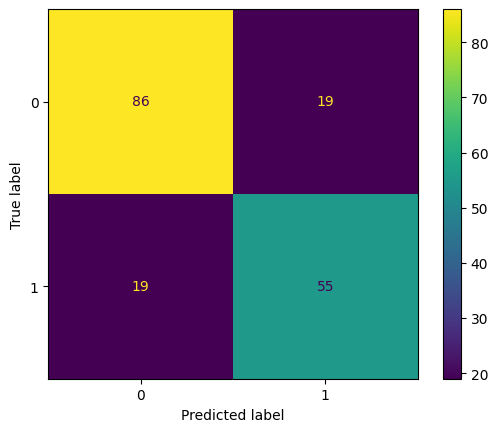

In [34]:
# Cell 16: Make predictions on validation set
logging.info("Making predictions on validation set...")
y_pred = best_model.predict(X_test)

# Display confusion matrix
logging.info("Displaying confusion matrix...")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [35]:
# Cell 17: Make predictions on test data
logging.info("Making predictions on test data...")
test_predictions = best_model.predict(test_data_rfe)

INFO:root:Making predictions on test data...


In [36]:
# Cell 18: Generate submission file
logging.info("Generating submission file...")
submission = pd.DataFrame(
    {
        "PassengerId": pd.read_csv("./data/test.csv")["PassengerId"],
        "Survived": test_predictions,
    }
)
submission.to_csv("submission.csv", index=False)
logging.info("Submission file generated: submission.csv")

# Display submission file
submission.head()

INFO:root:Generating submission file...
INFO:root:Submission file generated: submission.csv


,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
